# Long-Run Growth

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Read data from the source

In [18]:
data_url = "https://github.com/vinovator/Quantitative-Economics/raw/main/Datasets/mpd2023_web.xlsx"
#data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, sheet_name="Full data")
data.head()

,countrycode,country,region,year,gdppc,pop
0,AFG,Afghanistan,South and South East Asia,1,NaN,NaN
1,AFG,Afghanistan,South and South East Asia,730,NaN,NaN
2,AFG,Afghanistan,South and South East Asia,1000,NaN,NaN
3,AFG,Afghanistan,South and South East Asia,1090,NaN,NaN
4,AFG,Afghanistan,South and South East Asia,1150,NaN,NaN


In [19]:
countries = data.country.unique()
len(countries)

169

In [20]:
data.dropna()

,countrycode,country,region,year,gdppc,pop
703,AFG,Afghanistan,South and South East Asia,1950,1156.000000,8150.00
704,AFG,Afghanistan,South and South East Asia,1951,1170.000000,8284.00
705,AFG,Afghanistan,South and South East Asia,1952,1189.000000,8425.00
706,AFG,Afghanistan,South and South East Asia,1953,1240.000000,8573.00
707,AFG,Afghanistan,South and South East Asia,1954,1245.000000,8728.00
...,...,...,...,...,...,...
131139,ZWE,Zimbabwe,Sub Saharan Africa,2018,1900.199191,14096.56
131140,ZWE,Zimbabwe,Sub Saharan Africa,2019,1753.024449,14344.59
131141,ZWE,Zimbabwe,Sub Saharan Africa,2020,1585.972804,14614.82
131142,ZWE,Zimbabwe,Sub Saharan Africa,2021,1687.253154,14900.01


In [24]:
data.dropna().pivot_table(index = ["countrycode", "country", "region"],
                 values = "year",
                 aggfunc = ("min", "max"))

,,,max,min
countrycode,country,region,,
AFG,Afghanistan,South and South East Asia,2022,1950
AGO,Angola,Sub Saharan Africa,2022,1950
ALB,Albania,Eastern Europe,2022,1870
ARE,United Arab Emirates,Middle East and North Africa,2022,1950
ARG,Argentina,Latin America,2022,1820
...,...,...,...,...
YEM,Yemen,Middle East and North Africa,2022,1950
YUG,Former Yugoslavia,Eastern Europe,2022,1870
ZAF,South Africa,Sub Saharan Africa,2022,1700


In [26]:
gdp_pc = data.dropna().pivot_table(index = "year",
                          columns = "countrycode",
                          values = "gdppc",
                          dropna = True)

gdp_pc.columns

Index(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       ...
       'URY', 'USA', 'UZB', 'VEN', 'VNM', 'YEM', 'YUG', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='countrycode', length=169)

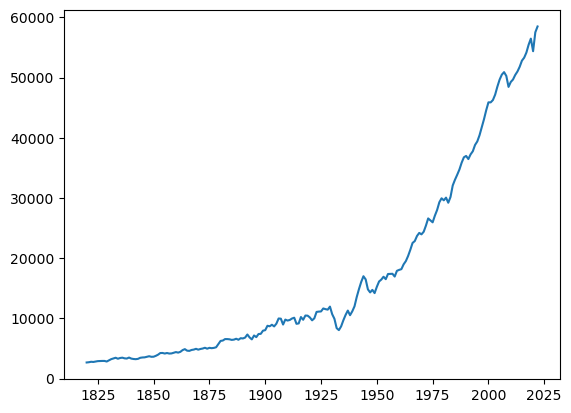

In [56]:
fig, ax = plt.subplots(dpi=100)
ax.plot(gdp_pc["USA"])
ax.set_ylabel="international dollars"
ax.set_xlabel="year"
plt.show()


In [30]:
gdp_pc["GBR"]

year
1                NaN
1000     1151.000000
1500     1697.000000
1600     1691.000000
1700     2412.000000
            ...     
2018    38704.602675
2019    39113.011733
2020    34651.183049
2021    37134.328380
2022    38406.531949
Name: GBR, Length: 208, dtype: float64